# Running regression on Mean Adult Female Literacy Rate

## Plan of Action

- Declare dependent and independent variables
- Make all variables numeric
- If non-numeric variable is used, make it a dummy variable
- Run a regression
- Interpret the results
- Visualize

## Data used

The final dataset is available in a csv file name "6.final-table".

## Data Exploration

First, import the packages:

In [63]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

Turn off any warnings appearing during the analysis.

In [64]:
warnings.filterwarnings("ignore")

Read the dataset into a new variable df.

In [65]:
df = pd.read_csv('6.final-table.csv')
df

,Country Name,Country Code,Status,Mean Adult Female Literacy Rate (%),Median Female Child Marriage Rate (%),Income Level,Mean Government Education Expenditure Rate (%),Mean GPI
0,Chad,TCD,Lowest,15.379128,24.5560,Low income,11.933025,2.576643
1,Afghanistan,AFG,Lowest,19.809310,16.3000,Low income,13.044702,3.306143
2,Mali,MLI,Lowest,20.470424,42.1000,Low income,16.659471,2.494071
3,Niger,NER,Lowest,20.530956,21.1555,Low income,16.770930,2.225214
4,Guinea,GIN,Lowest,22.271088,28.1000,Low income,12.861944,2.165071
5,Cuba,CUB,Highest,99.769315,12.3620,Upper middle income,15.123699,2.001071
6,Lithuania,LTU,Highest,99.777059,0.1500,High income,13.705299,1.691786
7,Estonia,EST,Highest,99.849846,4.8805,High income,13.668718,1.632643
8,Latvia,LVA,Highest,99.858515,4.8805,High income,14.311544,1.611214
9,"Korea, Dem. People's Rep.",PRK,Highest,99.997612,0.0500,Low income,15.258061,2.931000


Declare the dependent and independent variables in our model.

In [66]:
dependent_variable = 'Mean Adult Female Literacy Rate (%)'
independent_variables = ['Median Female Child Marriage Rate (%)', 'Income Level', 'Mean Government Education Expenditure Rate (%)', 'Mean GPI']

Drop rows with missing values in any of the selected columns.

In [67]:
df_selected = df[[dependent_variable] + independent_variables].dropna()

Make the dependent variable numeric.

In [68]:
df_selected[dependent_variable] = pd.to_numeric(df_selected[dependent_variable])

As we see in the dataset, the column "Income level" is categorical. We then change it to a dummy variable and divide into two columns as there are three categories. 

In [69]:
df_selected['Income Level'] = df_selected['Income Level'].astype('category')

In [70]:
df_encoded = pd.get_dummies(df_selected, drop_first=True)
df_encoded

,Mean Adult Female Literacy Rate (%),Median Female Child Marriage Rate (%),Mean Government Education Expenditure Rate (%),Mean GPI,Income Level_Low income,Income Level_Upper middle income
0,15.379128,24.5560,11.933025,2.576643,True,False
1,19.809310,16.3000,13.044702,3.306143,True,False
2,20.470424,42.1000,16.659471,2.494071,True,False
3,20.530956,21.1555,16.770930,2.225214,True,False
4,22.271088,28.1000,12.861944,2.165071,True,False
5,99.769315,12.3620,15.123699,2.001071,False,True
6,99.777059,0.1500,13.705299,1.691786,False,False
7,99.849846,4.8805,13.668718,1.632643,False,False
8,99.858515,4.8805,14.311544,1.611214,False,False
9,99.997612,0.0500,15.258061,2.931000,True,False


To check the correlation in our variables, we then plot the heatmap.

In [71]:
corr_matrix = df_encoded.corr()

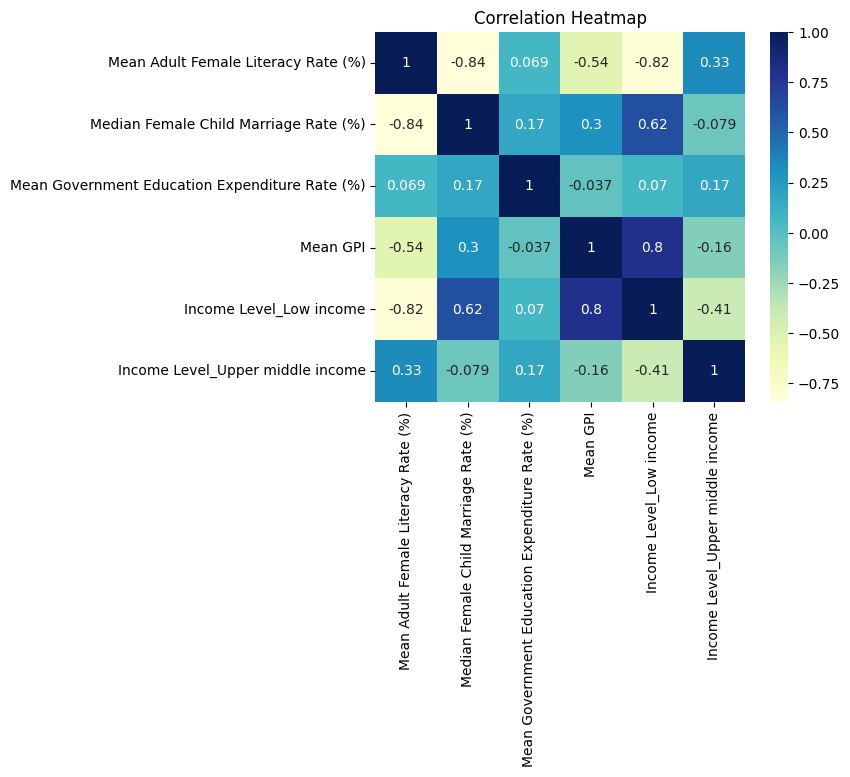

In [72]:
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', square=True)
plt.title('Correlation Heatmap')
plt.show()

The heatmap reveals that the Female Child Marriage Rate exhibit the strongest correlation with the Adult Female Literacy Rate, meaning that as the rate of child marriages among girls decrease, the average literacy rate among adult women tend to increase. On the other hand, the Global Peace Index had the lowest correlation with the Adult Female Literacy Rate, indicating that the level of peace in the country did not strongly affect adult female literacy.

Then, define the dependent variable and add a constant column for the intercept term.


In [73]:
y = df_encoded[dependent_variable]
y = np.asarray(y, dtype=float)

X = sm.add_constant(df_encoded.drop(columns=[dependent_variable]))
X = np.asarray(X, dtype=float)

Run the regression and print out the results.

In [74]:
model = sm.OLS(y, X)
results = model.fit()

In [75]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     6.627
Date:                Sat, 27 May 2023   Prob (F-statistic):             0.0454
Time:                        19:09:45   Log-Likelihood:                -39.965
No. Observations:                  10   AIC:                             91.93
Df Residuals:                       4   BIC:                             93.75
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.6508     84.878      0.455      0.6

const = Mean Adult Female Literacy Rate (%)<br>
x1 = Median Female Child Marriage Rate (%) <br>
x2 = Mean Government Education Expenditure Rate (%)	<br>
x3 = Mean GPI <br>
x4 = Income Level_Low income	<br>
x5 = Income Level_Upper middle income <br>

## Interpreting the results

The Adjusted R-squared value is high (0.76) but the p-values for most of the coefficients are higher than 0.1, it suggests that the overall model explains a significant proportion of the variance in the dependent variable, but some of the individual independent variables may not have a statistically significant effect on the dependent variable.

A p-value above the chosen significance level (0.1 in our case(10%)) indicates that there is insufficient evidence to conclude a significant effect on the dependent variable.

Even if this is the case, this can happen when the combination of the non-significant variables collectively explains a large portion of the variation in the dependent variable, even though no single variable has a significant effect on its own (this is suggested by Prob (F-statistic):0.0454, below 0.05).

The limitation of the model is that the data available is limited.

Now, create subplots for OLS regression line plots of independent variables, excluding Income level, which is categorical. List the variables to plot and show the plots.

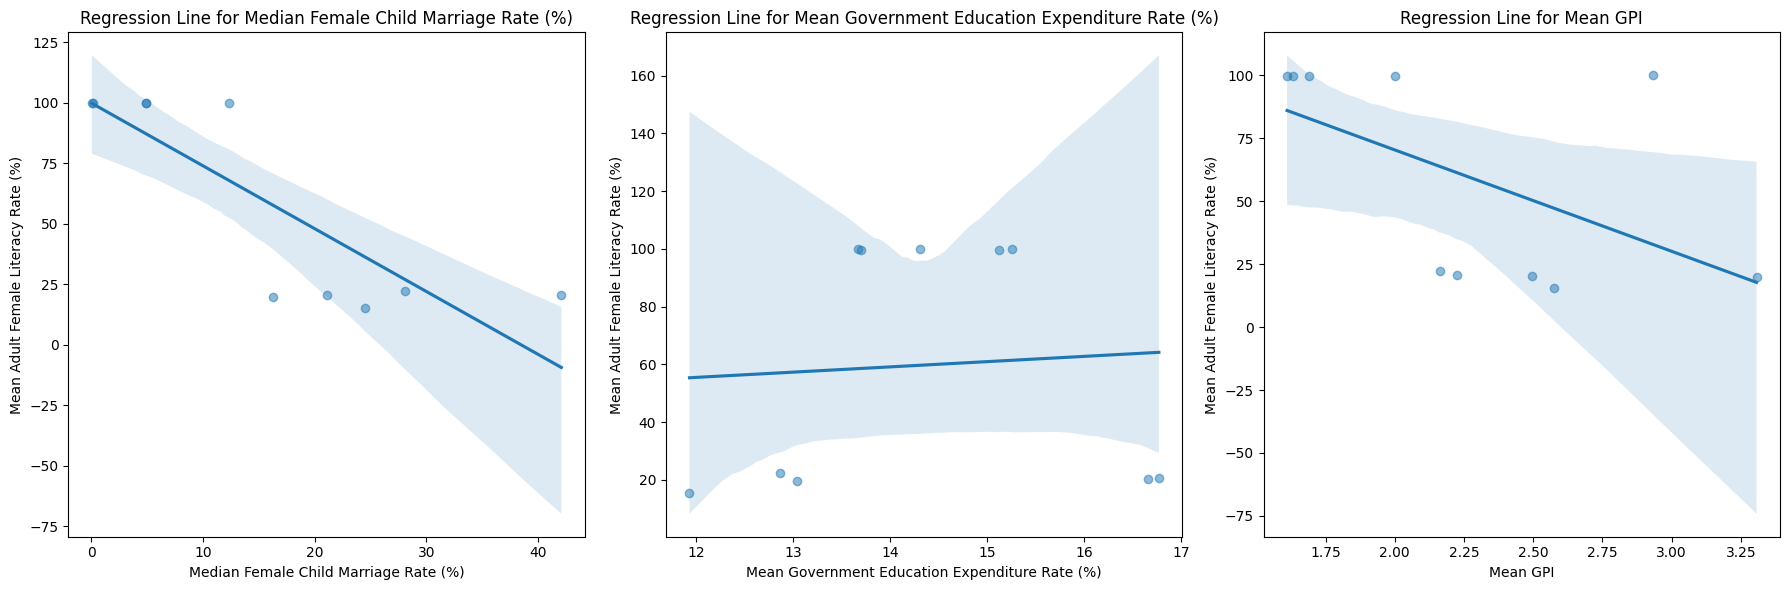

In [76]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
variables_to_plot = ['Median Female Child Marriage Rate (%)', 'Mean Government Education Expenditure Rate (%)', 'Mean GPI']

for i, var in enumerate(variables_to_plot):
    sns.regplot(x=var, y=dependent_variable, data=df_encoded, ax=axs[i], scatter_kws={'alpha': 0.5})
    axs[i].set_title(f'Regression Line for {var}')
    axs[i].set_xlabel(var)
    axs[i].set_ylabel(dependent_variable)
    
plt.tight_layout()
plt.show()

The plotted OLS regression lines further support the observation that only the variable Median Female Child Marriage Rate has a substantial descriptive impact on the dependent variable. The plots for Mean Government Education Expenditure Rate and Mean GPI show that these variables do not have significant independent descriptive power.

In the plot for Median Female Child Marriage Rate we can observe a clear linear relationship between this variable and the dependent variable. The regression line indicates a negative trend, suggesting that as the median female child marriage rate increases, the dependent variable tends to decrease. This implies that changes in the median female child marriage rate have a descriptive influence on the dependent variable.

However, in the plots for Mean Government Education Expenditure Rate and Mean GPI, we do not observe a noticeable or meaningful pattern in the relationship with the dependent variable. The LS regression lines appear to be nearly flat with wider confidence bands, indicating that changes in these variables do not have a strong descriptive impact on the dependent variable.

Therefore, based on these plots, we can conclude that the Median Female Child Marriage Rate  variable provides valuable descriptive information for understanding and predicting changes in the dependent variable, while the variables Mean Government Education Expenditure Rate and Mean GPI do not contribute significantly to its description when considered independently.

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_df = pd.DataFrame(X, columns= df_encoded.columns)
vif = vif = pd.DataFrame()
vif["Variable"] = X_df.columns
vif["VIF"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
print(vif)

                                         Variable         VIF
0             Mean Adult Female Literacy Rate (%)  166.272038
1           Median Female Child Marriage Rate (%)    2.390632
2  Mean Government Education Expenditure Rate (%)    1.121114
3                                        Mean GPI    4.428221
4                         Income Level_Low income    8.094600
5                Income Level_Upper middle income    1.727792


To explore the variables more, we need to know if there is multicolinearity among independent variables (multicollinearity refers to a situation in a regression model where two or more independent variables are strongly correlated with each other).

To check for multicollinearity in the regression model we calculate the variance inflation factor (VIF) for each independent variable. VIF measures the extent to which a predictor variable is linearly related to other predictor variables in the model. A high VIF value indicates high multicollinearity (as a rule of thumb, VIF values above 5 or 10 are often considered indicative of multicollinearity).

The VIF value for the intercept term is very high (166.272038), which is expected. This is because the intercept term is a constant and not a predictor variable. We can ignore the VIF value for the intercept term. 

The only variable that has significantly higher VIF value is Income Level_Low income, which is because it is a dummy variable connected to Income Level_Upper middle income. This result was also expected.

Overall, we can conclude that the model has explanatory power, as the variables in the model are jointly statistically significant. Moreover,the high Adjusted R-squared value of 0.75 suggests that approximately 75% of the variability in the dependent variable is explained by the independent variables in the model. This indicates a strong relationship between the independent variables and the dependent variable and suggests that the model is able to capture a significant portion of the variation in the data.

## Visualising the results

Predict values based on our model.

In [78]:
predicted_values = results.predict()
predicted_values

array([ 15.98328722,  36.39083491,   6.37195367,  46.84760094,
        14.31907523,  99.76931508, 104.80540977,  95.73010547,
        98.94990435,  78.54576597])

In [79]:
actual_values = df_encoded[dependent_variable]
actual_values

0    15.379128
1    19.809310
2    20.470424
3    20.530956
4    22.271088
5    99.769315
6    99.777059
7    99.849846
8    99.858515
9    99.997612
Name: Mean Adult Female Literacy Rate (%), dtype: float64

Create a new dataset with predicted and actual values of Mean Adult Female Literacy Rate.

In [80]:
data = pd.DataFrame({'Country': df['Country Name'], 'Actual': actual_values, 'Predicted': predicted_values})

Sort based on the values so that the plot looks better.

In [81]:
data_sorted = data.sort_values('Actual')
data_sorted

,Country,Actual,Predicted
0,Chad,15.379128,15.983287
1,Afghanistan,19.809310,36.390835
2,Mali,20.470424,6.371954
3,Niger,20.530956,46.847601
4,Guinea,22.271088,14.319075
5,Cuba,99.769315,99.769315
6,Lithuania,99.777059,104.805410
7,Estonia,99.849846,95.730105
8,Latvia,99.858515,98.949904
9,"Korea, Dem. People's Rep.",99.997612,78.545766


Plot the observed vs predicted values.

First, define a custom color palette similar to YlGnBu.

In [82]:
custom_palette = sns.color_palette("YlGnBu", 2)

Then set the width of the bars and define the x-axis positions for the bars.

In [83]:
bar_width = 0.35

x = np.arange(len(data_sorted['Country']))

Lastly, create the bar chart for observed and predicted values with the custom color and plot it.

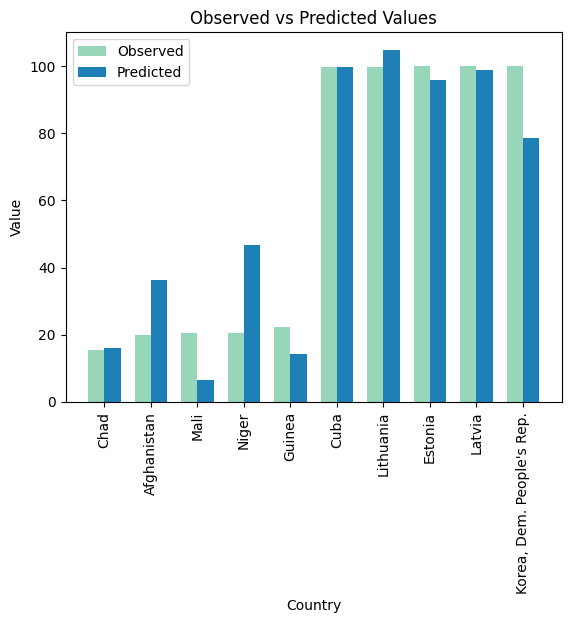

In [84]:
plt.bar(x, data_sorted['Actual'], width=bar_width, color=custom_palette[0], label='Observed')

plt.bar(x + bar_width, data_sorted['Predicted'], width=bar_width, color=custom_palette[1], label='Predicted')

plt.xlabel('Country')
plt.ylabel('Value')
plt.title('Observed vs Predicted Values')
plt.xticks(x + bar_width / 2, data_sorted['Country'], rotation=90)
plt.legend()
plt.show()

Comparing the observed and predicted values visually allows to assess the performance of our model. The overall pattern is captured well, despite the increased volatility, suggesting that the model provides useful insights and predictions. However, we see that in some cases the deviation is significant from the actual value which indicates limitations or deficiencies in the model.